<a href="https://colab.research.google.com/github/ibbu33/machinelearningfinalprojectgroup12/blob/main/ConcreteStrengthFinall.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt


In [2]:
#load data set and prepare variables

url = "https://archive.ics.uci.edu/ml/machine-learning-databases/concrete/compressive/Concrete_Data.xls"
df = pd.read_excel(url)

#renaming for clarity
df.columns = ['Cement', 'BlastFurnaceSlag', 'FlyAsh', 'Water', 'Superplasticizer',
              'CoarseAggregate', 'FineAggregate', 'Age', 'CompressiveStrength']

#seperating the input from variable features
X = df.drop('CompressiveStrength', axis=1)
y = df['CompressiveStrength']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#rescale data to fit
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [3]:
#Linear regression training model

lr = LinearRegression()
lr.fit(X_train_scaled, y_train)
y_pred_lr = lr.predict(X_test_scaled)

#evaluate the model using r2, mae, and mse (is consistent for all training models)
r2_lr = r2_score(y_test, y_pred_lr)
mae_lr = mean_absolute_error(y_test, y_pred_lr)
mse_lr = mean_squared_error(y_test, y_pred_lr)


In [4]:
#random forest training model

rf = RandomForestRegressor(random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

r2_rf = r2_score(y_test, y_pred_rf)
mae_rf = mean_absolute_error(y_test, y_pred_rf)
mse_rf = mean_squared_error(y_test, y_pred_rf)


In [5]:
#gradient boost training model

gbm = GradientBoostingRegressor(random_state=42)
gbm.fit(X_train, y_train)
y_pred_gbm = gbm.predict(X_test)

r2_gbm = r2_score(y_test, y_pred_gbm)
mae_gbm = mean_absolute_error(y_test, y_pred_gbm)
mse_gbm = mean_squared_error(y_test, y_pred_gbm)


In [6]:
#nueral netwrok training model

#initialize neural network with two hidden layers of 64 neurons each, relu to activate and training for 1000 iterations
nn = MLPRegressor(hidden_layer_sizes=(64, 64), activation='relu', max_iter=1000, random_state=42)
nn.fit(X_train_scaled, y_train)
y_pred_nn = nn.predict(X_test_scaled)

r2_nn = r2_score(y_test, y_pred_nn)
mae_nn = mean_absolute_error(y_test, y_pred_nn)
mse_nn = mean_squared_error(y_test, y_pred_nn)


In [7]:
#linear reg tuning

from sklearn.linear_model import Ridge

param_grid_lr = {
    'alpha': [0.1, 1.0, 10.0, 100.0] #lower alpha score means less regulation and higher alpha score indicates more penalties on coeffiecents
}

#5 cross fold val and using r2 as the scoring metric (applicable to all models below)
grid_lr = GridSearchCV(Ridge(), param_grid_lr, cv=5, scoring='r2')
#find best performing linear model (will scale accross all model tuning)
grid_lr.fit(X_train_scaled, y_train)
best_lr = grid_lr.best_estimator_
print("Best Linear Params:", grid_lr.best_params_)


Best Linear Params: {'alpha': 1.0}


In [8]:
#random forest hyperparameter tuning

param_grid_rf = {
    'n_estimators': [100, 200, 300], # represents # of trees in the forest
    'max_depth': [None, 10, 20, 30], # max depth of each tree
    'min_samples_split': [2, 5, 10] #what is the min required to split the node
}

grid_rf = GridSearchCV(RandomForestRegressor(random_state=42), param_grid_rf, cv=5, scoring='r2')
grid_rf.fit(X_train, y_train)
best_rf = grid_rf.best_estimator_
print("Best Random Forest Params:", grid_rf.best_params_)



Best Random Forest Params: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 300}


In [9]:
#gradient boost tuning

param_grid_gbm = {
    'n_estimators': [100, 200],
    'learning_rate': [0.05, 0.1, 0.2], #lower = slower, higher = faster
    'max_depth': [3, 5, 7],
    'subsample': [0.8, 1.0] #help to reduce overfitting by fractioning samples per tree
}

grid_gbm = GridSearchCV(GradientBoostingRegressor(random_state=42), param_grid_gbm, cv=5, scoring='r2')
grid_gbm.fit(X_train, y_train)
best_gbm = grid_gbm.best_estimator_
print("Best GBM Params:", grid_gbm.best_params_)



Best GBM Params: {'learning_rate': 0.05, 'max_depth': 5, 'n_estimators': 200, 'subsample': 0.8}


In [10]:
# Neural Network Tuning
param_grid_nn = {
    'hidden_layer_sizes': [(64, 64), (128, 64), (128, 128)], # number of neurons per hidden layer
    'activation': ['relu', 'tanh'], # activate hidden layers relu and tanh
    'learning_rate_init': [0.001, 0.01], # this is the inital learning rate
    'alpha': [0.0001, 0.001], #overfitting prevention
    'max_iter': [2000],  # increased to allow convergence
    'early_stopping': [True], #stop training if val score does not improve
    'validation_fraction': [0.1] # this represents the portion of data training when early stop is enabled, again to optimize time mainly
}

grid_nn = GridSearchCV(MLPRegressor(random_state=42), param_grid_nn, cv=5, scoring='r2', n_jobs=-1)
grid_nn.fit(X_train_scaled, y_train)

best_nn = grid_nn.best_estimator_
print("Best NUeral Network Params:", grid_nn.best_params_)



Best NUeral Network Params: {'activation': 'tanh', 'alpha': 0.0001, 'early_stopping': True, 'hidden_layer_sizes': (128, 128), 'learning_rate_init': 0.01, 'max_iter': 2000, 'validation_fraction': 0.1}


In [11]:
#cross val score - linear regression

from sklearn.preprocessing import StandardScaler

#standardize accross all for consitency across folds
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)  # scale the full dataset

cv_scores_lr = cross_val_score(best_lr, X_scaled, y, cv=5, scoring='r2')
print("Ridge CV r2:", np.round(cv_scores_lr, 3))
print("Mean:", np.mean(cv_scores_lr).round(3))



Ridge CV r2: [0.335 0.411 0.455 0.608 0.5  ]
Mean: 0.462


In [12]:
#cross val score - random forest

cv_scores_rf = cross_val_score(best_rf, X, y, cv=5, scoring='r2')
print("RF CV r2:", np.round(cv_scores_rf, 3))
print("Mean:", np.mean(cv_scores_rf).round(3))



RF CV r2: [ 0.658  0.668  0.746  0.833 -1.253]
Mean: 0.33


In [13]:
#cross val score - gradient boosting

cv_scores_gbm = cross_val_score(best_gbm, X, y, cv=5, scoring='r2')
print("GBM CV r2:", np.round(cv_scores_gbm, 3))
print("Mean:", np.mean(cv_scores_gbm).round(3))



GBM CV r2: [ 0.788  0.713  0.755  0.872 -0.984]
Mean: 0.429


In [14]:
#cross val score - nueral networks

cv_scores_nn = cross_val_score(best_nn, X_scaled, y, cv=5, scoring='r2')
print("NN CV r2:", np.round(cv_scores_nn, 3))
print("Mean:", np.mean(cv_scores_nn).round(3))


NN CV r2: [ 0.32   0.748  0.553  0.901 -0.102]
Mean: 0.484


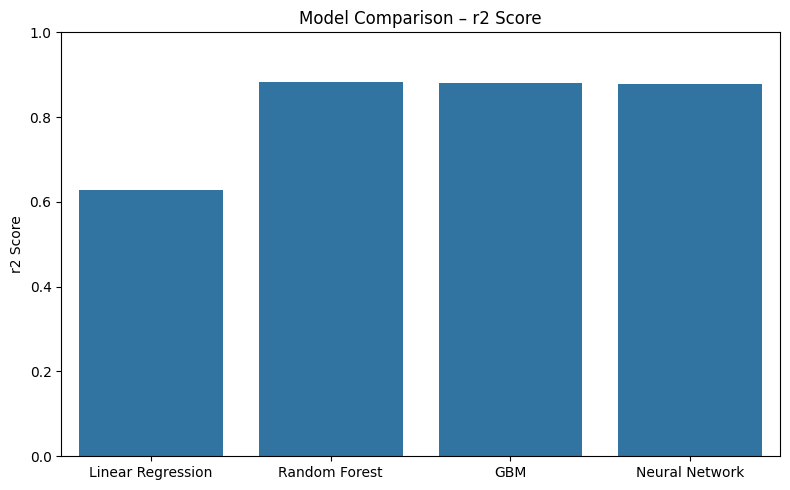

In [15]:
#summary of r2 scores mapped

import matplotlib.pyplot as plt
import seaborn as sns

models = ['Linear Regression', 'Random Forest', 'GBM', 'Neural Network']
r2_scores = [r2_lr, r2_rf, r2_gbm, r2_nn]

plt.figure(figsize=(8, 5))
sns.barplot(x=models, y=r2_scores)
plt.ylim(0, 1)
plt.ylabel('r2 Score')
plt.title('Model Comparison – r2 Score')
plt.tight_layout()
plt.show()


In [16]:
#summary of trained models

performance = pd.DataFrame({
    'Model': models,
    'r2': [r2_lr, r2_rf, r2_gbm, r2_nn],
    'MAE': [mae_lr, mae_rf, mae_gbm, mae_nn],
    'MSE': [mse_lr, mse_rf, mse_gbm, mse_nn]
})
print(performance)


               Model        r2       MAE        MSE
0  Linear Regression  0.627542  7.745393  95.975484
1      Random Forest  0.882187  3.754819  30.358062
2                GBM  0.880798  4.100611  30.716163
3     Neural Network  0.877097  4.017002  31.669664


In [17]:
#actual vs predicted strength testing
import pandas as pd

sample = X_test.iloc[:5]
preds = best_nn.predict(X_test_scaled[:5])

pd.DataFrame({
    'Cement': X_test.iloc[:5]['Cement'],
    'Water': X_test.iloc[:5]['Water'],
    'Age': X_test.iloc[:5]['Age'],
    'Actual Strength': y_test.iloc[:5].values,
    'Predicted Strength': np.round(y_pred_rf[:5], 2)
})


,Cement,Water,Age,Actual Strength,Predicted Strength
31,266.0,228.0,365,52.908320,51.93
109,362.6,164.9,7,55.895819,40.68
136,389.9,145.9,28,74.497882,70.81
88,362.6,164.9,3,35.301171,34.92
918,145.0,202.0,28,10.535193,11.16


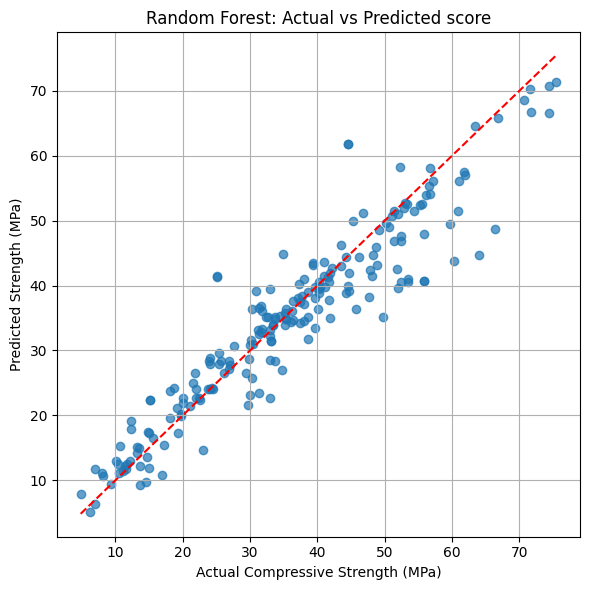

In [18]:
#actual vs predicted plot testing

import matplotlib.pyplot as plt

plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred_rf, alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--', color='red')
plt.xlabel("Actual Compressive Strength (MPa)")
plt.ylabel("Predicted Strength (MPa)")
plt.title("Random Forest: Actual vs Predicted score")
plt.grid(True)
plt.tight_layout()
plt.show()


In [19]:
#all models compared

comparison_df = pd.DataFrame({
    'Actual': y_test.values,
    'Linear Regression': y_pred_lr,
    'Random Forest': y_pred_rf,
    'GBM': y_pred_gbm,
    'Neural Network': y_pred_nn
})

comparison_df.head()


,Actual,Linear Regression,Random Forest,GBM,Neural Network
0,52.908320,59.657163,51.934711,48.898782,48.330456
1,55.895819,52.037144,40.677698,45.478309,41.641583
2,74.497882,63.519839,70.813943,69.370915,73.632637
3,35.301171,51.571366,34.923003,33.939904,36.447354
4,10.535193,17.220160,11.159266,13.317017,10.780866


In [20]:
#r2 score accuracy testing
from sklearn.metrics import r2_score

r2 = r2_score(y_test, y_pred_rf)
print("r2 Score:", r2)


r2 Score: 0.8821874643599863


#references

https://stackoverflow.com/questions/51459406/how-to-apply-standardscaler-in-pipeline-in-scikit-learn-sklearn

https://stackoverflow.com/questions/56302294/ridge-regression-vs-lasso-regression

https://archive.ics.uci.edu/ml/datasets/Concrete+Compressive+Strength

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html

https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingRegressor.html

https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPRegressor.html

https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html

https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html

https://scikit-learn.org/stable/modules/model_evaluation.html

https://scikit-learn.org/stable/modules/classification_threshold.html

https://scikit-learn.org/stable/modules/grid_search.html

https://scikit-learn.org/stable/computing.html

https://scikit-learn.org/stable/datasets.html

https://scikit-learn.org/stable/data_transforms.html

https://scikit-learn.org/stable/visualizations.html

1.10. Decision Trees — scikit-learn 1.6.1 documentation

https://www.datacamp.com/tutorial/decision-tree-classification-python

https://stackoverflow.com/questions/73235377/singleton-array-cannot-be-considered-a-valid-collection

https://www.datacamp.com/tutorial/decision-tree-classification-python

https://stackoverflow.com/questions/32506951/how-to-explore-a-decision-tree-built-using-scikit-learn

https://stackoverflow.com/questions/51170770/classification-algorithm-decision-tree

https://stackoverflow.com/questions/61464069/regarding-prediction-of-decision-tree

https://stats.stackexchange.com/questions/553721/need-help-with-understanding-decision-trees

https://github.com/labex-labs/sklearn-free-tutorials

https://stackoverflow.com/questions/30317119/classifiers-in-scikit-learn-that-handle-nan-null

https://stackoverflow.com/questions/56821868/python-pause-loop-on-user-input

https://stackoverflow.com/questions/50782852/how-to-send-goal-value-dynamically-from-website-to-google-analytics/50784545#50784545

https://stackoverflow.com/questions/40155128/plot-trees-for-a-random-forest-in-python-with-scikit-learn

https://github.com/xbeat/Machine-Learning/blob/main/15%20Most%20Commonly%20Used%20ML%20Algorithms%20in%20Python.md

https://github.com/DCtheTall/hands-on-machine-learning

https://stackoverflow.com/questions/76590378/why-does-randomforestclassifier-not-support-missing-values-while-decisiontreecla

https://github.com/juanjocarin/W207-Machine-Learning/blob/master/Forest/W207-Carin_Mahmud_Sakhamuri.ipynb

https://stackoverflow.com/questions/30766253/scikit-learn-random-forest-taking-up-too-much-memory

https://github.com/joelgrus/random-forest-python

https://stackoverflow.com/questions/50238302/spring-boot-javax-persistence-entitynotfoundexception-in-many-to-one-however-dat

https://github.com/fchollet/deep-learning-with-python-notebooks

https://stackoverflow.com/questions/41099228/a-recursive-puzzle-c-code/41099443#41099443

https://github.com/rasbt/python-machine-learning-book

https://stackoverflow.com/questions/41668884/how-to-remove-blank-spaces-from-data

https://www.geeksforgeeks.org/building-and-implementing-decision-tree-classifiers-with-scikit-learn-a-comprehensive-guide/

https://scikit-learn.org/stable/data_transforms.html

https://scikit-learn.org/stable/modules/kernel_approximation.html

https://scikit-learn.org/stable/computing.html

https://scikit-learn.org/stable/modules/cross_validation.html

https://scikit-learn.org/stable/modules/classification_threshold.html

https://stackoverflow.com/questions/56824968/grid-search-for-keras-with-multiple-inputs

https://stackoverflow.com/questions/42415076/how-to-insert-keras-model-into-scikit-learn-pipeline

https://stackoverflow.com/questions/70550018/sklearn-custom-transformers-with-pipeline-all-the-input-array-dimensions-for-th

https://stackoverflow.com/questions/44181511/hyperparameter-tune-for-tensorflow

https://stackoverflow.com/questions/47279677/how-use-grid-search-with-fit-generator-in-keras

https://stackoverflow.com/questions/44260217/hyperparameter-optimization-for-pytorch-model

https://stackoverflow.com/questions/44802939/hyperparameter-tuning-of-tensorflow-model

https://stackoverflow.com/questions/46580199/hyperparameter-in-voting-classifier

https://stackoverflow.com/questions/79466339/mlp-with-data-and-physics-loss

https://stackoverflow.com/questions/79209538/how-to-implement-a-dmlpcnn-model-with-two-mlps-blocks-in-python

https://stackoverflow.com/questions/78979797/i-implemented-a-mlp-neural-network-in-c-but-if-i-normally-compile-it-doesnt

https://stackoverflow.com/questions/78689386/attributeerror-mlpclassifier-object-has-no-attribute-best-validation-score

https://stackoverflow.com/questions/78562670/mlp-with-single-hidden-layer-implemented-form-scratch-with-pytorch

https://stackoverflow.com/questions/78383064/getting-worse-results-when-binary-cross-entropy-loss-is-computed-from-logits-in

https://stackoverflow.com/questions/26821197/cv-function-in-ridgecv

https://stackoverflow.com/questions/28064634/random-state-pseudo-random-number-in-scikit-learn

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegressionCV.html

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

https://numpy.org/doc/stable/reference/generated/numpy.mean.html

https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.plot.html

https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html

https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html

https://scikit-learn.org/stable/modules/generated/sklearn.metrics.r2_score.html

https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html

https://stackoverflow.com/questions/37895372/predictions-of-ridge-regression-in-r

https://stackoverflow.com/questions/13411544/delete-a-column-from-a-pandas-dataframe

